#  Automatic speech classification based on SVM model

### Motivation: 
#### Automatically classifying the hate speech on social media is a daunting process. Major social media companies are facing the challenge of separting the hate speech ( which can be potentially harmful, especially for minority groups, and/or can lead to promote violence) vs offensive speech.
### Data:
#### The data has been taken from paper " Automated Hate Speech Detection and the Problem of Offensive Language" by T. Davidson, D. Warmsley, M. Macy and I. Weber.  Here data was divided into three categories: hate speech, offensive and non-offensive language.


In [7]:
# Importing necessary libraries
from __future__ import absolute_import, division, print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
import string


### Hate Speech is class 0;      Offensive language is class 1;      Non-offensive language is class 2;


In [8]:
#Fetching the data 

data=pd.read_csv('labeled_data.csv')
data.head() 


,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### Considering only the required columns.

In [9]:

d={'class':data['class'],'tweet':data['tweet']}
df=pd.DataFrame(d)
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### Removing punctuation from the tweets

In [10]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['tweet_clean'] = df['tweet'].apply(lambda x: remove_punct(x))
df.head()

,class,tweet,tweet_clean
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compl...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuff...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me ...


### Tokenization

In [11]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['tweet_tokenized'] = df['tweet_clean'].apply(lambda x: tokenize(x.lower()))

df.head()

,class,tweet,tweet_clean,tweet_tokenized
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compl...,"[, rt, mayasolovely, as, a, woman, you, should..."
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuff...,"[, rt, mleew17, boy, dats, coldtyga, dwn, bad,..."
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...,"[, rt, urkindofbrand, dawg, rt, 80sbaby4life, ..."
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny,"[, rt, cganderson, vivabased, she, look, like,..."
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me ...,"[, rt, shenikaroberts, the, shit, you, hear, a..."


### Removing Stopwords

In [12]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [13]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

df['tweet_nonstop'] = df['tweet_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,class,tweet,tweet_clean,tweet_tokenized,tweet_nonstop
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldnt compl...,"[, rt, mayasolovely, as, a, woman, you, should...","[, rt, mayasolovely, woman, shouldnt, complain..."
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew17 boy dats coldtyga dwn bad for cuff...,"[, rt, mleew17, boy, dats, coldtyga, dwn, bad,...","[, rt, mleew17, boy, dats, coldtyga, dwn, bad,..."
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT 80sbaby4life You eve...,"[, rt, urkindofbrand, dawg, rt, 80sbaby4life, ...","[, rt, urkindofbrand, dawg, rt, 80sbaby4life, ..."
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT CGAnderson vivabased she look like a tranny,"[, rt, cganderson, vivabased, she, look, like,...","[, rt, cganderson, vivabased, look, like, tranny]"
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you hear about me ...,"[, rt, shenikaroberts, the, shit, you, hear, a...","[, rt, shenikaroberts, shit, hear, might, true..."


### Lemmatizing 

In [15]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['body_text_lemmatized'] = df['tweet_nonstop'].apply(lambda x: lemmatizing(x))


### Keeping only the required columns

In [16]:
df=df.drop(['tweet_tokenized','tweet_nonstop','tweet_clean','tweet'], axis=1)

df.head()


,class,body_text_lemmatized
0,2,"[, rt, mayasolovely, woman, shouldnt, complain..."
1,1,"[, rt, mleew17, boy, dat, coldtyga, dwn, bad, ..."
2,1,"[, rt, urkindofbrand, dawg, rt, 80sbaby4life, ..."
3,1,"[, rt, cganderson, vivabased, look, like, tranny]"
4,1,"[, rt, shenikaroberts, shit, hear, might, true..."


### Buildling an SVM model for classifying the cleaned data

In [18]:
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score



### Divide data into 80% train  and 20% test data

In [19]:

X_train, X_test, y_train, y_test = train_test_split(df['body_text_lemmatized'],df['class'],
                                                   test_size=0.2,
                                                   random_state=200)


### Encoding the y data

In [20]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)


### Vectorizing the data

In [21]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(" ".join(x) for x in df['body_text_lemmatized'])

X_train_vec = Tfidf_vect.transform(" ".join(x) for x in X_train)
X_test_vec = Tfidf_vect.transform(" ".join(x) for x in X_test)


### Fitting the SVM data with C=0.65 

In [24]:
SVM = svm.SVC(C=0.65, kernel='linear', degree=3, gamma='auto')

SVM.fit(X_train_vec,y_train)# Fitting the model
y_pred = SVM.predict(X_test_vec)# predicting the labels on test dataset

### SVM model Accuracy: 90%

In [25]:
print("SVM Accuracy Score: ",accuracy_score(y_pred, y_test)*100)

SVM Accuracy Score:  89.9737744603591


### Confusion Matrix

In [37]:
results = confusion_matrix(y_test,y_pred) 
print('Confusion Matrix :\n',results) 
 

Confusion Matrix :
 [[  29  209   29]
 [  24 3701  144]
 [   2   89  730]]


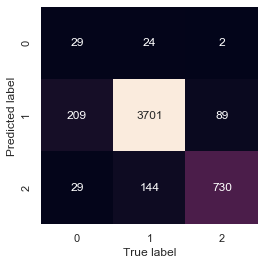

In [38]:
import seaborn as sns; sns.set()
sns.heatmap(results.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label');


### Classification Report

In [40]:
target_names = ['Hate Speech', 'Offensive', 'Non_Offensive']
print ('\n\nReport : ', classification_report(y_test,y_pred,target_names=target_names))



Report :                 precision    recall  f1-score   support

  Hate Speech       0.53      0.11      0.18       267
    Offensive       0.93      0.96      0.94      3869
Non_Offensive       0.81      0.89      0.85       821

     accuracy                           0.90      4957
    macro avg       0.75      0.65      0.66      4957
 weighted avg       0.88      0.90      0.88      4957



## Conclusion:

### The hate speech class has much lower precision, recall and f1-score in comparison to other classes. This indicates the difficulty in correctly distinguishing the speech.